# Ad Sales Prediction

### Description

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

So, Here in our case we are going to predict the future sales 

In [81]:
#Import all the Libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [82]:
#Load the datadet
df=pd.read_csv("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/Ad_sales.csv")

In [83]:
df.head().append(df.tail())

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [84]:
#we will drop the column which is not needed
df.drop('Unnamed: 0',axis=1,inplace=True)

In [85]:
df_column=df.columns

In [86]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [87]:
#to get the shape of the dataset
df.shape

(200, 4)

In [88]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [89]:
#find the datatypes
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [90]:
#finding if any null values are avilable
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [91]:
#finding the correlation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## Univariate Analysis

TV              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
radio        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
newspaper    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
sales        AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
dtype: object

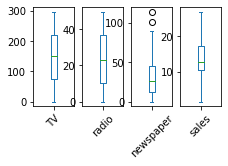

In [92]:
df.plot(kind='box',subplots=True,layout=( 2,7),rot=45)

we have no outliers in the dataset. hence we wont treat it for removing outliers

#### Plotting histplot with the intent of removing skewness

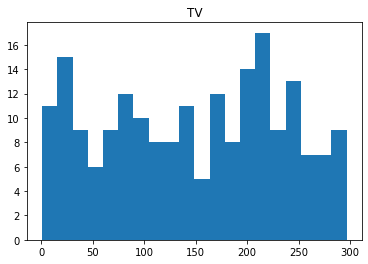

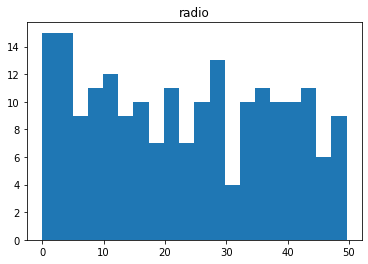

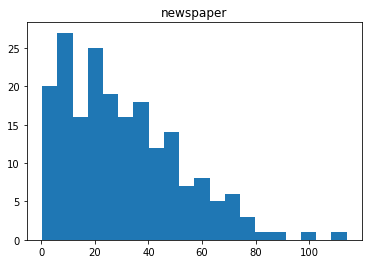

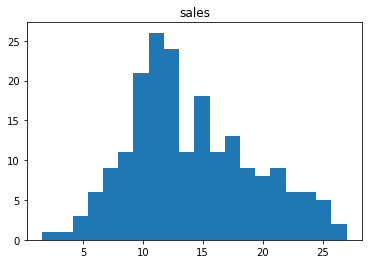

In [93]:
#knowing if data is having any skewness
for i in df_column:
    plt.title(i)
    plt.hist(bins=20,x=df[i])
    plt.show()
    

Newspaper is right skewed and we will remove the skewness

In [94]:
#removing the skewness
from scipy.stats import boxcox
df['newspaper']= boxcox(df['newspaper'],0)

### Multivariate Analysis

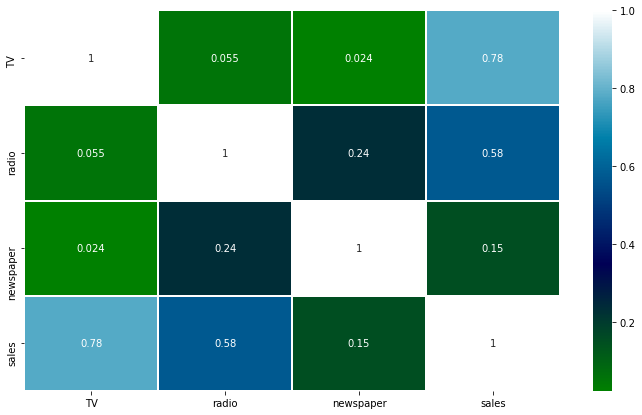

In [95]:
#knowing the how much one feature is correlated to target feature
corr_hmap=df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_hmap,annot=True,cmap='ocean',lw=1)
plt.show()

In [96]:
x = df.drop('sales',axis=1)
y = df['sales']

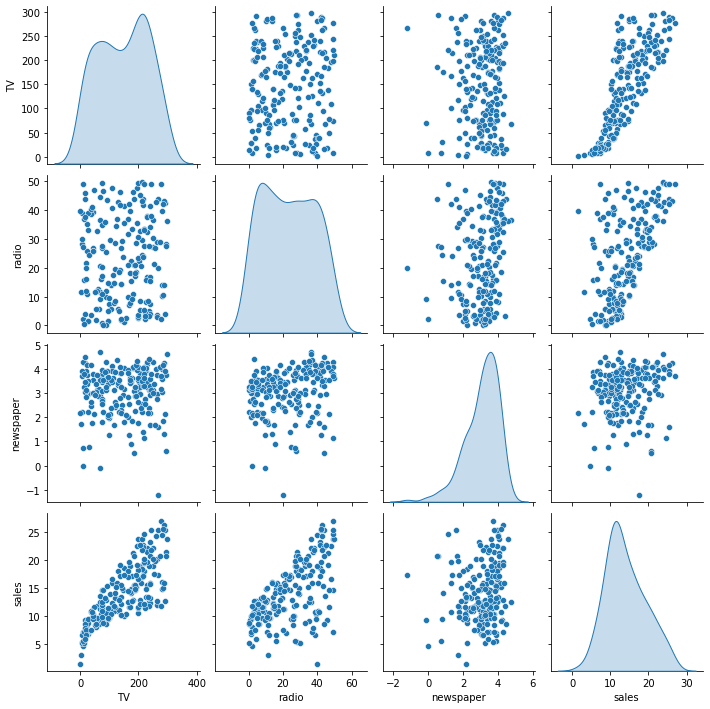

In [97]:
sns.pairplot(df,diag_kind='kde')

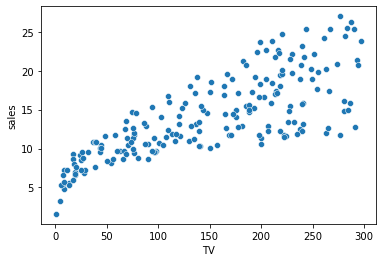

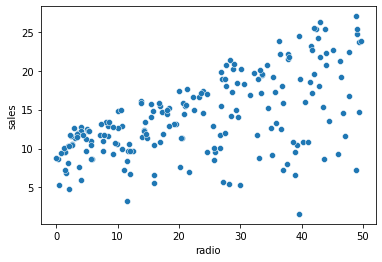

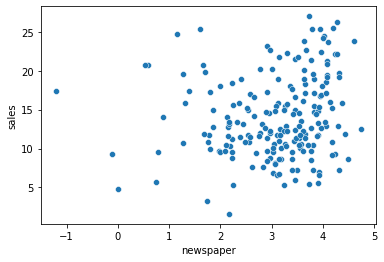

In [98]:
for i in ['TV', 'radio', 'newspaper']:
    sns.scatterplot(x=i,y='sales',data=df)
    plt.show()
          

### Polynomial Regression

From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features

We will go from the equation in the form (shown here as if we only had one x feature):

y^=β0+β1x1+ϵ
 
and create more features from the original x feature for some d degree of polynomial.

y^=β0+β1x1+β1x21+...+βdxd1+ϵ
 
Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of d , the degree of the model. Our metric results on the test set will help us with this!

The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take interaction terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [99]:
#importing polynomial fetures
from sklearn.preprocessing import PolynomialFeatures

In [100]:
polynomial_conevrter = PolynomialFeatures(degree=2, include_bias=False)

In [101]:
#fitting the dataset
polynomial_features = polynomial_conevrter.fit_transform(x)

In [102]:
print(x.shape)
print(polynomial_features.shape)

(200, 3)
(200, 9)


In [103]:
data = pd.DataFrame(polynomial_features,columns='tv rad news tv**2 tv*rad tv*news rad**2 rad*news news**2'.split())

We converted the previous data frame into a degree 2 data frame where new columns are added

In [104]:
data.head()

,tv,rad,news,tv**2,tv*rad,tv*news,rad**2,rad*news,news**2
0,230.1,37.8,4.237001,52946.01,8697.78,974.933898,1428.84,160.158633,17.952176
1,44.5,39.3,3.808882,1980.25,1748.85,169.495260,1544.49,149.689072,14.507584
2,17.2,45.9,4.238445,295.84,789.48,72.901252,2106.81,194.544621,17.964415
3,151.5,41.3,4.069027,22952.25,6256.95,616.457553,1705.69,168.050805,16.556979
4,180.8,10.8,4.067316,32688.64,1952.64,735.370713,116.64,43.927012,16.543059


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train, x_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=42)

### Standardising the dataset

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Fit the model to the dataset

In [109]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)
model.coef_

array([ 4.99097984, -0.05048682,  0.41810085, -2.82780456,  3.56446557,
       -0.80852032,  0.27452181,  0.37016322, -0.05910677])

##### Evaluation on the training dataset

In [110]:
test_predictions = model.predict(x_test_scaled)

In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [112]:
mae = mean_absolute_error(y_test,test_predictions)
rmse = np.sqrt(mean_squared_error(y_test,test_predictions))

In [113]:
mae

0.5527735216391502

In [114]:
rmse

0.6969894374289457

RMSE is better in terms of reflecting performance when dealing with large error values.

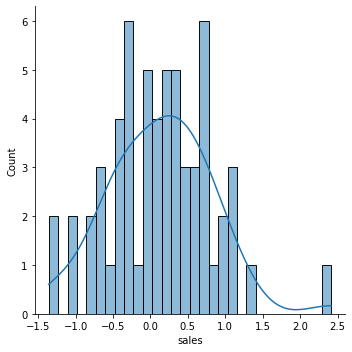

In [115]:
sns.displot(y_test-test_predictions, bins=30, kde=True)

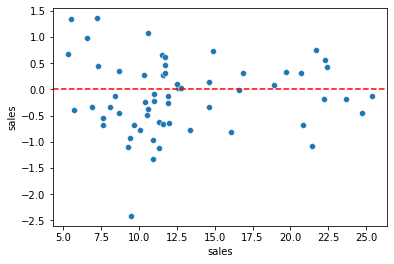

In [116]:
sns.scatterplot(x=y_test,y=test_predictions-y_test)
plt.axhline(y=0,c='r',ls='--')

<AxesSubplot:xlabel='sales'>

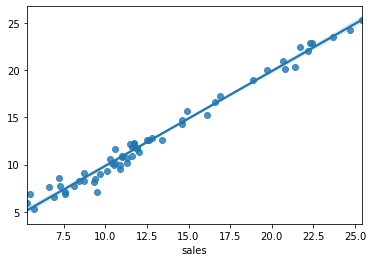

In [123]:
sns.regplot(x=y_test,y=test_predictions)


#### Choosing best degress for polynomial features

we chose polynomial features to boost the linear regression model. The model will perform better in case of applying polynomial features instead of applying Linear model seperately.

Adjusting Parameters
Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

Create different order polynomial X data
Split that polynomial data for train/test
Fit on the training data
Report back the metrics on both the train and test results
Plot these results and explore overfitting

In [38]:
# Training error per degree
train_rmse_errors = []
# Test error per degree
test_rmse_errors = []

for d in range(1,10):
    
    # Create poly dataset for data "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(x)
    
    # Split this new poly dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    # Scaling
    x_train_scaled = scaler.fit_transform(X_train)
    x_test_scaled = scaler.transform(X_test)
    
    # Train on this new poly set
    model = LinearRegression(fit_intercept=True)
    model.fit(x_train_scaled,y_train)
    
    # Predict on both Train & Test
    train_pred = model.predict(x_train_scaled)
    test_pred = model.predict(x_test_scaled)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)


In [39]:
poly = pd.DataFrame()
poly['Train error'] = train_rmse_errors
poly['Test error'] = test_rmse_errors
new_index = "1 2 3 4 5 6 7 8 9".split()
poly['degree'] = new_index
poly.set_index('degree')

,Train error,Test error
degree,,
1,1.575833e+00,1.926871
2,5.879165e-01,0.696989
3,4.564589e-01,0.624678
4,3.684022e-01,0.677076
5,2.482598e-01,2.116238
6,2.025135e-01,5.678492
7,1.270827e-01,118.178398
8,1.441030e-10,396.200058
9,5.753852e-11,149.308956


Minimum test error is found at degree 2, so it will be a good choice for the degree, can be seen from the plots below too

In [40]:
poly['Test error'].min()

0.6246781913094847

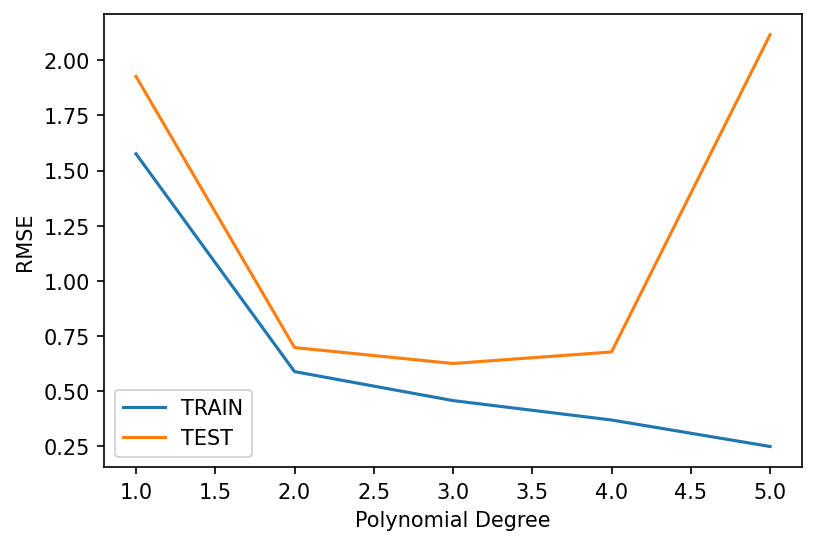

In [41]:
plt.figure(dpi=150)
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.legend()


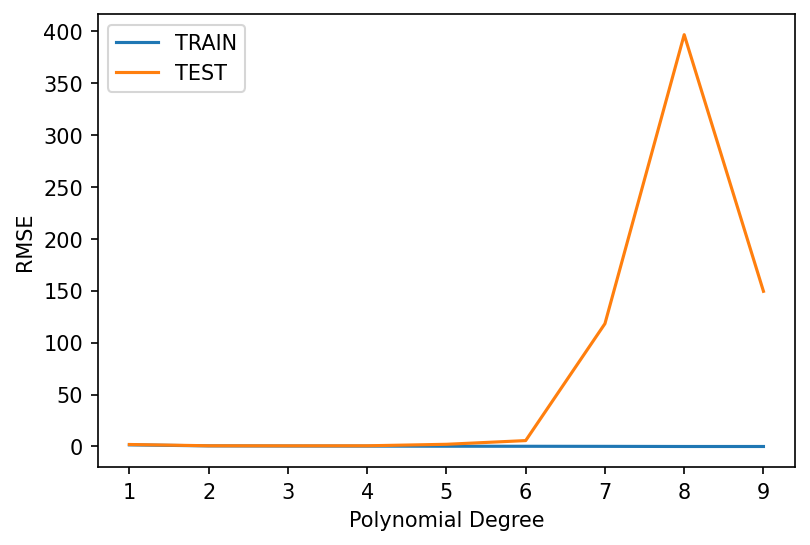

In [42]:
plt.figure(dpi=150)
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.legend()

If we consider 10 sample error measures,we found that at 9 degree the error score is high & its decreasing for the degree 10.

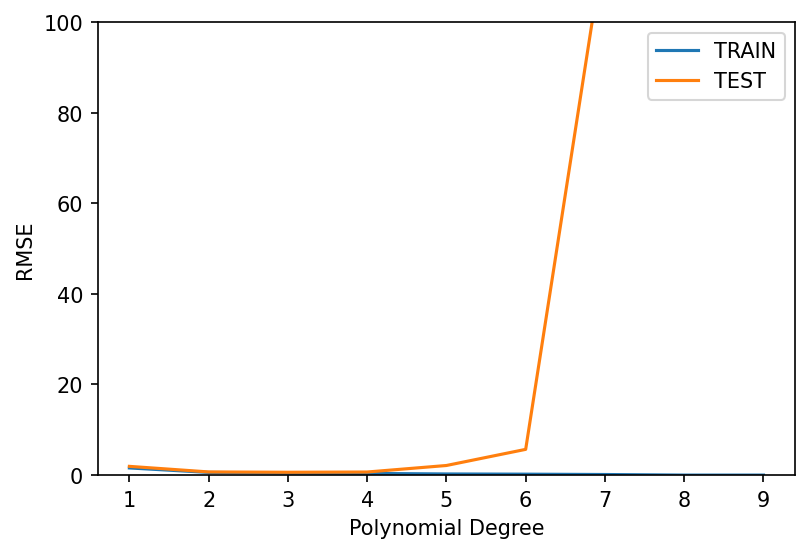

In [43]:
plt.figure(dpi=150)
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

In the above line plot we get clear picture of the RMSE value gradually raising at degree 6 to 7

In [44]:
final_poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [45]:
polynomial_features = final_poly_converter.fit_transform(x)

In [46]:
scaled_polynomial_features = scaler.fit_transform(polynomial_features)

In [47]:
scaled_polynomial_features

array([[ 0.96985227,  0.98152247,  1.19661021, ...,  0.91053374,
         1.45367516,  1.48396308],
       [-1.19737623,  1.08280781,  0.75540811, ...,  1.06810238,
         1.27503055,  0.80688752],
       [-1.51615499,  1.52846331,  1.19809839, ...,  1.83424153,
         2.04041151,  1.48636879],
       ...,
       [ 0.34981006, -0.942899  , -1.25684795, ..., -0.91836599,
        -0.98457746, -1.36742927],
       [ 1.59456522,  1.26512143,  1.15093536, ...,  1.36717622,
         1.72555991,  1.41052622],
       [ 0.99320602, -0.99016549, -0.9404401 , ..., -0.93543763,
        -0.96169554, -1.12484747]])

In [48]:
final_model = LinearRegression()

In [49]:
final_model.fit(scaled_polynomial_features,y)

LinearRegression()

In [50]:
new_data = [[200,27,32]]

In [51]:
new_data_polynomial = polynomial_conevrter.fit_transform(new_data)

In [52]:
new_data_polynomial

array([[2.000e+02, 2.700e+01, 3.200e+01, 4.000e+04, 5.400e+03, 6.400e+03,
        7.290e+02, 8.640e+02, 1.024e+03]])

In [53]:
new_data_scaled = scaler.transform(new_data_polynomial)

In [54]:
new_data_scaled

array([[ 6.18378249e-01,  2.52268021e-01,  2.98080584e+01,
         4.33089657e-01,  5.69660917e-01,  1.86435665e+01,
        -4.29710711e-02,  1.34634888e+01,  1.99234618e+02]])

In [55]:
final_model.predict(new_data_scaled)

array([25.56878202])

### Model Building of Linear Regression

Performing Simple Linear Regression

Equation of linear regression
𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛 
𝑦  is the response
𝑐  is the intercept
𝑚1  is the coefficient for the first feature
𝑚𝑛  is the coefficient for the nth feature
In our case:

𝑦=𝑐+𝑚1×𝑇𝑉 
The  𝑚  values are called the model coefficients or model parameters.

Generic Steps in model building using statsmodels
We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [56]:
X = df['TV']
y = df['sales']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Building a linear model

You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [58]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [60]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [62]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.84e-30
Time:                        10:25:02   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

### Looking at some key statistics from the summary

The values we are concerned with are -

1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

###### 1. The coefficient for TV is 0.0465, with a very low p value

The coefficient is statistically significant. So the association is not purely by chance.

###### 2. R - squared is 0.613


Meaning that 61.3% of the variance in Sales is explained by TV

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

𝑆𝑎𝑙𝑒𝑠=6.98+0.0465×𝑇𝑉

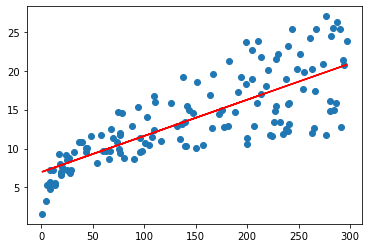

In [66]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.98 + 0.0465*X_train, 'r')
plt.show()

### Model Evaluation

### Residual analysis

To validate assumptions of the model, and hence the reliability for inference

### Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [67]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


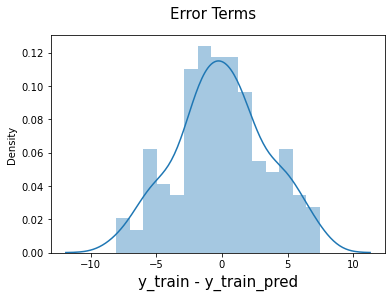

In [68]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

### Looking for patterns in the residuals

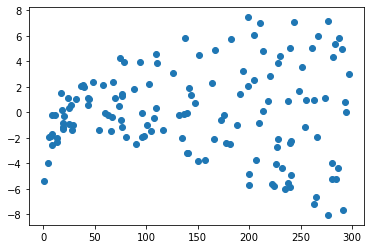

In [69]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [71]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [72]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

###### Checking the R-squared on the test set

In [75]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.59429872677833

###### Visualizing the fit on the test set

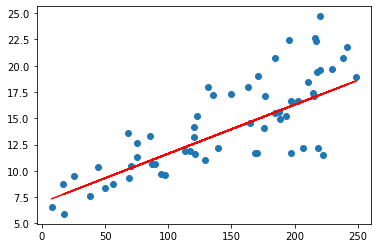

In [77]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.98 + 0.0465 * X_test, 'r')
plt.show()